# KFUPM<br>College of Computer Science and Engineering<br>Computer Engineering Department<br>COE 449: Privacy Enhancing Technologies

Fall 2019 (191)

Assignment 2: Due date Thursday 26/10/

Student: **Faris Hijazi s201578750**


## Tasks

### Question1: Laplace Mechanism (20 pts)

Prove that a Laplace mechanism that adds random noise us-
ing Laplace distribution with $\frac{GS_F}{\epsilon}$ is $\epsilon$-deferentially private.


![solution1](./notebook_images/COE449-HW2_p1.jpg)


### Question2: Composition (30 pts)

- (a) Assume that you have $k$ randomized algorithms $A_1 ,...,A_k$, each is $\epsilon$differentially private. Prove that if you execute $A_1 ,...,A_k$, sequentially then the composed mechanisms is $k\epsilon$-differentially private.
- (b) Assume that you have a database partitioned in $k$ disjoint subsets $D_i$.
For each subset, we run a randomized mechanims $A_i$ that is $\epsilon$-differentially private. Prove that executing the $k$ mechanisms in parallel over $D$ is $\epsilon$-differentially private.


![solution12](./notebook_images/COE449-HW2_p2.jpg)


### Question3: Differential Privacy Implementation (50 pts)

The goal of this task is to understand the concept of differential privacy by implementing a differentially private histogram using Laplace mechanism.
The objective is to generate and draw noisy histogram bins.

#### Input

Your program takes the following as inputs

- Input dataset files
- Privacy budget $\epsilon$
- Number and sizes of bins

#### Dataset description

The dataset used in this task is the IPUMS data extracted
from the 2001 US Census. The dataset has 8 attributes as
described in Table 1. The size of the dataset is 20,000 tuples (rows). All attributes include numerical values only.
For example, Gender attributes can be either 1 or 2, which represents Male and Female, respectively. The Income attribute is the annual income in thousand USD, for example, an income
of 20 means 20,000 (20K).

|  .   |.        |.         |.             |.             |.          |.            |.            |
| --- | ------ | ------- | ----------- | ----------- | -------- | ---------- | ---------- |
| Age | Gender | Marital | Race status | Birth place | Language | Occupation | Income (K) |

Table 1: Scheme of Census dataset

#### Output

The output of your program is a differentially private his-
togram for each of the following two dimensions in IPUMS
dataset

- Age
- Salary


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_BINS = 10 # number of bins
epsilon = 0.1 # privacy budget E


In [2]:
data = pd.read_csv('ipums.csv')
data.head()

,Age,Gender,Marital,Race status,Birth place,Language,Occupation,Income (K)
0,33,1,6,2,1,1,10,144
1,40,2,4,1,1,1,6,830
2,21,2,6,1,1,1,3,992
3,39,1,4,1,1,1,6,673
4,55,2,4,1,1,1,10,470


In [3]:
age = data['Age']
salary = data['Income (K)']

age_hist, age_bins = np.histogram(age, bins=N_BINS)
salary_hist, salary_bins = np.histogram(salary, bins=N_BINS)


Unperturbed histograms (RAW)


Text(0.5, 1.0, 'salary (RAW)')

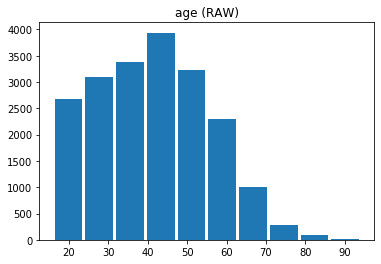

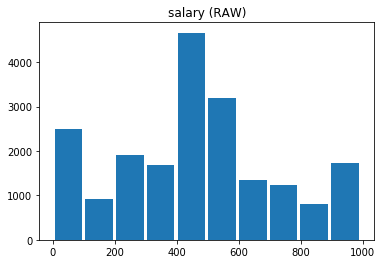

In [16]:

def plot_hist_from_bins(hist, bins, **kwargs):
    fig, ax = plt.subplots()
    # hist, bins = np.histogram(x, **kwargs)
    width = 0.9 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    ax.bar(center, hist, align='center', width=width)
    return fig

print('Unperturbed histograms (RAW)')

f = plot_hist_from_bins(age_hist, age_bins)
plt.title('age (RAW)')

f = plot_hist_from_bins(salary_hist, salary_bins)
plt.title('salary (RAW)')


lambda =  10.0


Text(0.5, 1.0, 'salary (Laplace)')

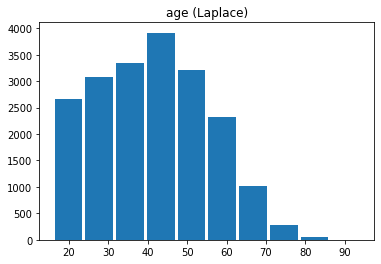

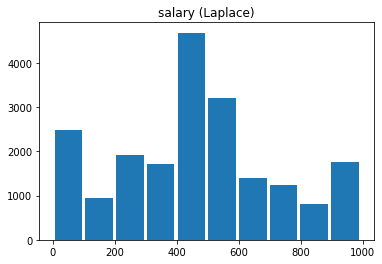

In [17]:
# adding the Laplace noise to each bin
lambda_ = 1/epsilon
print('lambda = ', lambda_)

age_hist_laplace += np.random.laplace(scale=lambda_, size=age_hist.shape)
salary_hist_laplace += np.random.laplace(scale=lambda_, size=salary_hist.shape)

f = plot_hist_from_bins(age_hist_laplace, age_bins)
plt.title('age (Laplace)')

f = plot_hist_from_bins(salary_hist_laplace, salary_bins)
plt.title('salary (Laplace)')

In [21]:
# buckets/bins deltas (new vs old)
print('Age bin deltas:', age_hist_laplace - age_hist)
print()
print('Salary bin deltas:', salary_hist_laplace - salary_hist)



Age bin deltas: [ -5.19483814 -21.90559102 -19.27379443 -21.51569508 -11.06537617
   7.99750608  15.08609657  -2.61397685 -36.36093136 -13.91743756]

Salary bin deltas: [-0.11418419 31.42963447  5.40823898 17.81573584 21.2316597   4.37342763
 38.67691332 13.10542777 13.36646206 36.2452841 ]



## Submission

The due date of this assignment is 11:59PM 26/10/2019. Please upload
all files on the assignment page on BlackBoard. You need to submit the
following:

1. A brief report including your answers to Questions 1 and 2. In addition,
    the report should include the obtained differentially private histograms
    from Question 3, and a comparison with the original hostograms (without privacy). Explain and discuss, if any, the algorithmic optimizations
    you have used in your implementation. Discuss the experiences and
    lessons you have learned from the implementation.
2. A zip file that contains the PDF brief report, the source files of your code (in any language), and a README   explaining how to compile/run your program

## References

1. <https://people.eecs.berkeley.edu/~stephentu/writeups/6885-lec20-b.pdf>
